# Preparation

Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import tensorflow as tf
import keras

from keras import layers
from keras import Sequential
from keras import datasets
from keras import models
from keras import losses

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

from keras.backend import categorical_crossentropy

import warnings
warnings.filterwarnings(action='ignore')

Dataset

In [ ]:
mnist = datasets.mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28 ,28, 1))
X_test = X_test.reshape((10000, 28 ,28, 1))

11501568/11490434 [==============================] - 0s 0us/step


# Convolution Neural Network

Design

In [ ]:
CNN = models.Sequential([
      layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1)),
      layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
      layers.Conv2D(64, kernel_size=(2,2), padding='same', activation='relu'),
      layers.MaxPooling2D(pool_size=(2,2)),
      layers.Dropout(0.25),
      layers.Flatten(),
      layers.Dense(1000, activation='relu'),
      layers.Dense(10, activation='softmax')
])

CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

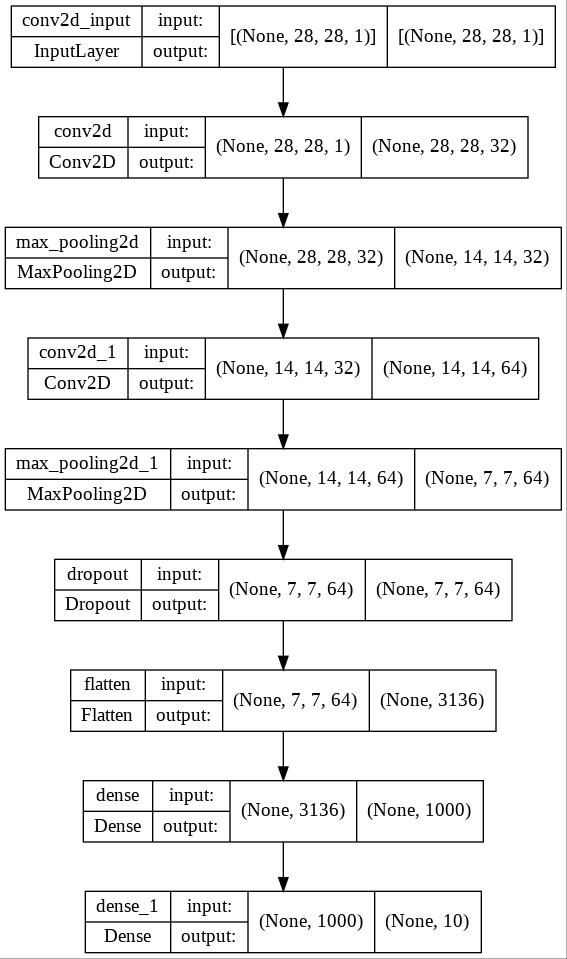

In [ ]:
tf.keras.utils.plot_model(CNN, to_file='CNN_plot.jpg', show_shapes=True)

Fit CNN model

In [ ]:
%%time
CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
CNN.fit(X_train, Y_train, epochs=5, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/5
1875/1875 [==============================] - 134s 71ms/step - loss: 0.1158 - accuracy: 0.9644 - val_loss: 0.0376 - val_accuracy: 0.9872
Epoch 2/5
1875/1875 [==============================] - 132s 70ms/step - loss: 0.0462 - accuracy: 0.9856 - val_loss: 0.0322 - val_accuracy: 0.9891
Epoch 3/5
1875/1875 [==============================] - 133s 71ms/step - loss: 0.0330 - accuracy: 0.9899 - val_loss: 0.0314 - val_accuracy: 0.9899
Epoch 4/5
1875/1875 [==============================] - 133s 71ms/step - loss: 0.0250 - accuracy: 0.9919 - val_loss: 0.0277 - val_accuracy: 0.9907
Epoch 5/5
1875/1875 [==============================] - 131s 70ms/step - loss: 0.0218 - accuracy: 0.9930 - val_loss: 0.0346 - val_accuracy: 0.9893
CPU times: user 18min 42s, sys: 38.8 s, total: 19min 20s
Wall time: 11min 22s


Check Loss & Accuracy

In [ ]:
score_CNN = CNN.evaluate(X_test, Y_test)

print('LOSS: {}'.format(score_CNN[0]))
print('ACCURACY: {}'.format(score_CNN[1]))

313/313 [==============================] - 6s 18ms/step - loss: 0.0346 - accuracy: 0.9893
LOSS: 0.03464951738715172
ACCURACY: 0.989300012588501


How many digits can not be predicted in CNN?

In [ ]:
pred_result = CNN.predict(X_test)
pred_labels = np.argmax(pred_result, axis=1)

wrong_result = []
for n in range(0, len(Y_test)):
    if pred_labels[n] != Y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

107

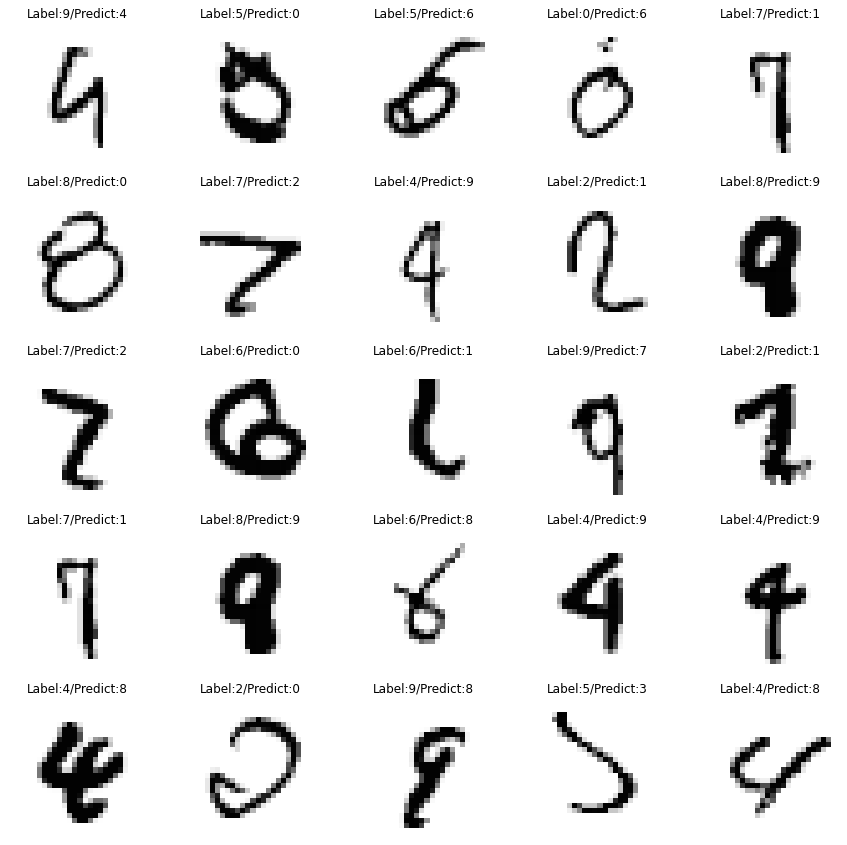

In [ ]:
sample_CNN = random.choices(population=wrong_result, k=25)

plt.figure(figsize=(15, 15))

for index, i in enumerate(sample_CNN):
    plt.subplot(5, 5, index + 1)
    plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label:{}/Predict:{}'.format(str(Y_test[i]),str(pred_labels[i])))
    plt.axis('off')
    
plt.show()

# Recurrent Neural Network

Design

In [ ]:
RNN = models.Sequential([
      layers.LSTM(64, input_shape=(None, 28)),
      layers.BatchNormalization(),
      layers.Dense(10),
])

RNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                23808     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 24,714
Trainable params: 24,586
Non-trainable params: 128
_________________________________________________________________


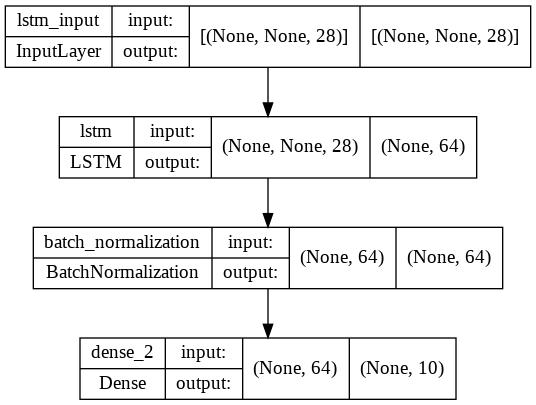

In [ ]:
tf.keras.utils.plot_model(RNN, to_file='RNN_plot.jpg', show_shapes=True)

Fit RNN model

In [ ]:
%%time
RNN.compile(optimizer='sgd', loss=losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
RNN.fit(X_train, Y_train, epochs=5, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/5
1875/1875 [==============================] - 31s 15ms/step - loss: 0.6864 - accuracy: 0.7813 - val_loss: 0.3250 - val_accuracy: 0.8968
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2487 - accuracy: 0.9235 - val_loss: 0.1748 - val_accuracy: 0.9432
Epoch 3/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1762 - accuracy: 0.9452 - val_loss: 0.1940 - val_accuracy: 0.9394
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1436 - accuracy: 0.9560 - val_loss: 0.1161 - val_accuracy: 0.9629
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1253 - accuracy: 0.9611 - val_loss: 0.0905 - val_accuracy: 0.9706
CPU times: user 3min 39s, sys: 10.2 s, total: 3min 49s
Wall time: 3min 23s


Check Loss & Accuracy

In [ ]:
score_RNN = RNN.evaluate(X_test, Y_test)

print('LOSS: {}'.format(score_RNN[0]))
print('ACCURACY: {}'.format(score_RNN[1]))

313/313 [==============================] - 2s 7ms/step - loss: 0.0905 - accuracy: 0.9706
LOSS: 0.09047488123178482
ACCURACY: 0.9706000089645386


How many digits can not be predicted in RNN?

In [ ]:
pred_result = RNN.predict(X_test)
pred_labels = np.argmax(pred_result,  axis=1)

wrong_result = []
for n in range(0, len(Y_test)):
    if pred_labels[n] != Y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

294

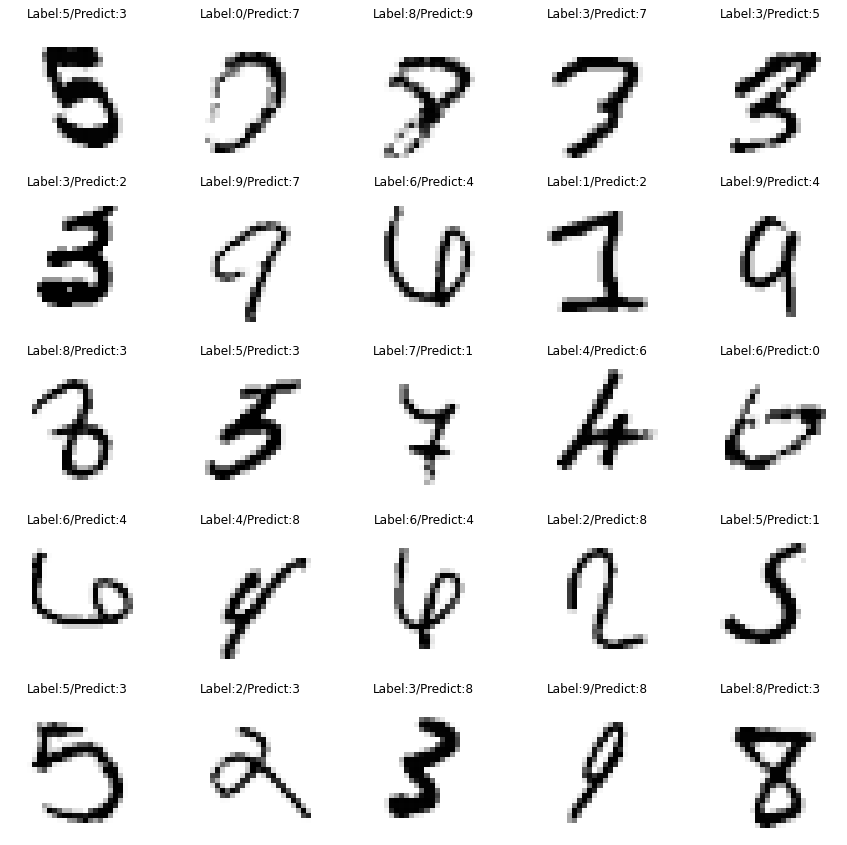

In [ ]:
sample_RNN = random.choices(population=wrong_result, k=25)

plt.figure(figsize=(15, 15))

for index, i in enumerate(sample_RNN):
    plt.subplot(5, 5, index + 1)
    plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label:{}/Predict:{}'.format(str(Y_test[i]),str(pred_labels[i])))
    plt.axis('off')
    
plt.show()

# Deep Neural Network

Design

In [ ]:
DNN = models.Sequential([
      layers.Flatten(input_shape=(28,28,1)),
      layers.Dense(units=256, activation='relu'),
      layers.Dense(units=256, activation='relu'),
      layers.Dense(units=10, activation='softmax'),
])

DNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


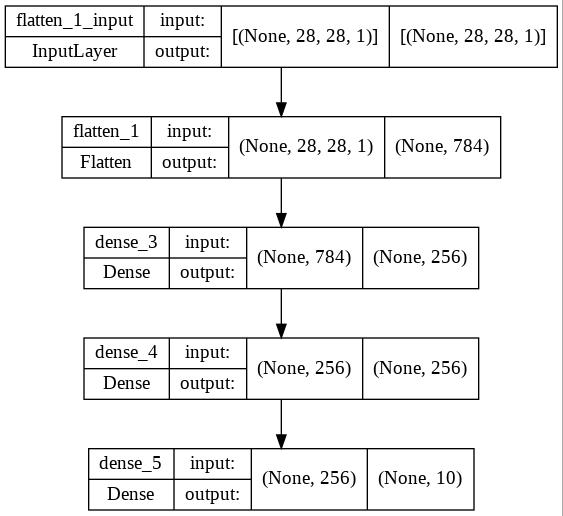

In [ ]:
tf.keras.utils.plot_model(DNN, to_file='DNN_plot.jpg', show_shapes=True)

Fit DNN model

In [ ]:
%%time
DNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
DNN.fit(X_train, Y_train, epochs=5, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1977 - accuracy: 0.9406 - val_loss: 0.0992 - val_accuracy: 0.9695
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0842 - accuracy: 0.9742 - val_loss: 0.0791 - val_accuracy: 0.9757
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0592 - accuracy: 0.9813 - val_loss: 0.0701 - val_accuracy: 0.9777
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0441 - accuracy: 0.9859 - val_loss: 0.0785 - val_accuracy: 0.9769
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0349 - accuracy: 0.9890 - val_loss: 0.0783 - val_accuracy: 0.9801
CPU times: user 57.4 s, sys: 3.92 s, total: 1min 1s
Wall time: 47.6 s


Check Loss & Accuracy

In [ ]:
score_DNN = DNN.evaluate(X_test, Y_test)

print('LOSS: {}'.format(score_DNN[0]))
print('ACCURACY: {}'.format(score_DNN[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0783 - accuracy: 0.9801
LOSS: 0.07826049625873566
ACCURACY: 0.9800999760627747


How many digits can not be predicted in DNN?

In [ ]:
pred_result = DNN.predict(X_test)
pred_labels = np.argmax(pred_result,  axis=1)

wrong_result = []
for n in range(0, len(Y_test)):
    if pred_labels[n] != Y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

199

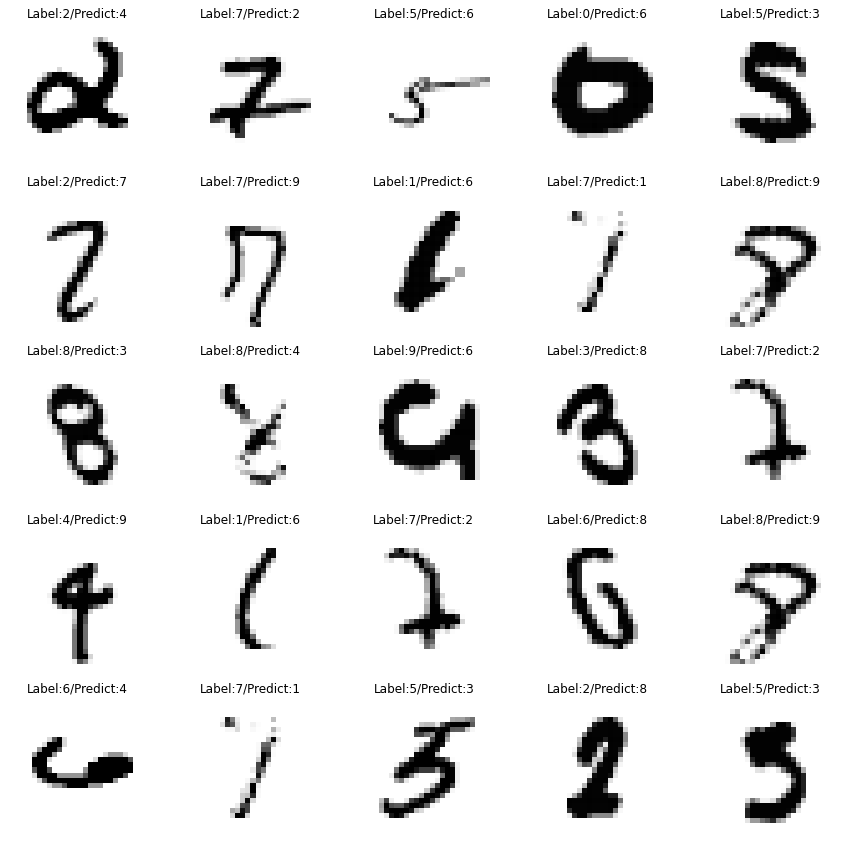

In [ ]:
sample_DNN = random.choices(population=wrong_result, k=25)

plt.figure(figsize=(15, 15))

for index, i in enumerate(sample_DNN):
    plt.subplot(5, 5, index + 1)
    plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label:{}/Predict:{}'.format(str(Y_test[i]),str(pred_labels[i])))
    plt.axis('off')
    
plt.show()